# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [2]:
import math
import sys

In [3]:
import matplotlib. pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [4]:
# YOUR CODE HERE
url = "https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz"

df = pd.read_csv(url, sep="\t")
df = df.dropna()

# Show a random sample of 10 rows
print(df.sample(10, random_state=42))

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
803             7.7              0.56         0.08            2.50      0.114   
124             7.8              0.50         0.17            1.60      0.082   
350            10.7              0.67         0.22            2.70      0.107   
682             8.5              0.46         0.31            2.25      0.078   
1326            6.7              0.46         0.24            1.70      0.077   
976             7.2              0.41         0.30            2.10      0.083   
1493            7.7              0.54         0.26            1.90      0.089   
706             7.0              0.78         0.08            2.00      0.093   
613             8.2              0.39         0.38            1.50      0.058   
1587            5.8              0.61         0.11            1.80      0.066   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
803                  14.0      

YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [6]:
# YOUR CODE HERE
descriptions = {
    'fixed acidity': 'Non-volatile acids contributing to sourness.',
    'volatile acidity': 'Volatile acids like acetic acid that affect smell.',
    'citric acid': 'Natural acid that adds freshness and flavor.',
    'residual sugar': 'Sugar left after fermentation; affects sweetness.',
    'chlorides': 'Salt level in wine.',
    'free sulfur dioxide': 'Unbound SO2 that protects wine from spoilage.',
    'total sulfur dioxide': 'Total SO2, including bound and free forms.',
    'density': 'Density of wine influenced by sugar and alcohol.',
    'pH': 'Acidity level of the wine.',
    'sulphates': 'Compounds that enhance flavor and act as preservatives.',
    'alcohol': 'Percentage of alcohol in the wine.',
    'target': 'The quality score of the wine (0–10).'
}

# Print each column with description
print("### Column Names and Descriptions ###")
for col in df.columns:
    print(f"{col}: {descriptions[col]}")

# Show a random sample of 10 rows
print("\n### Random Sample of 10 Rows ###")
print(df.sample(10, random_state=42))

# Show summary statistics
print("\n### Summary Statistics ###")
print(df.describe())

### Column Names and Descriptions ###
fixed acidity: Non-volatile acids contributing to sourness.
volatile acidity: Volatile acids like acetic acid that affect smell.
citric acid: Natural acid that adds freshness and flavor.
residual sugar: Sugar left after fermentation; affects sweetness.
chlorides: Salt level in wine.
free sulfur dioxide: Unbound SO2 that protects wine from spoilage.
total sulfur dioxide: Total SO2, including bound and free forms.
density: Density of wine influenced by sugar and alcohol.
pH: Acidity level of the wine.
sulphates: Compounds that enhance flavor and act as preservatives.
alcohol: Percentage of alcohol in the wine.
target: The quality score of the wine (0–10).

### Random Sample of 10 Rows ###
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
803             7.7              0.56         0.08            2.50      0.114   
124             7.8              0.50         0.17            1.60      0.082   
350            10.7    

YOUR ANSWERS HERE

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

### Shape of the dataset ###
(1599, 12)

### Column names ###
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')

### Summary statistics ###
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  tota

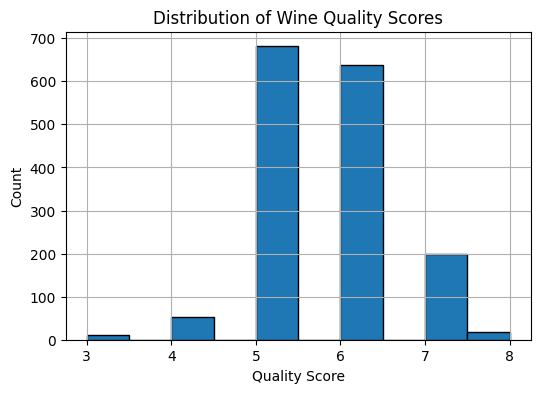

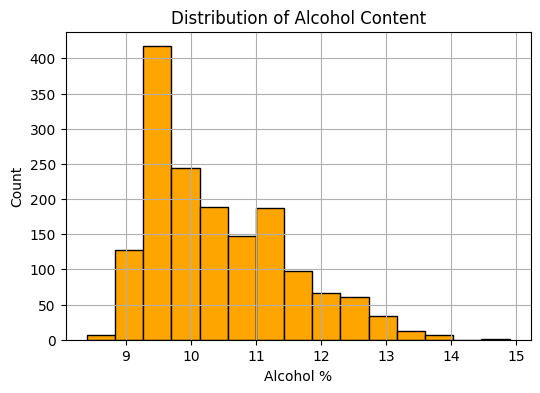

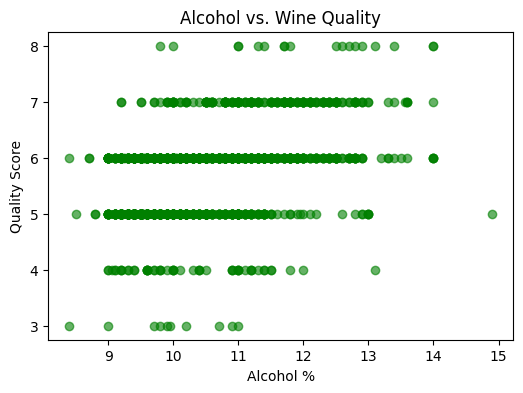

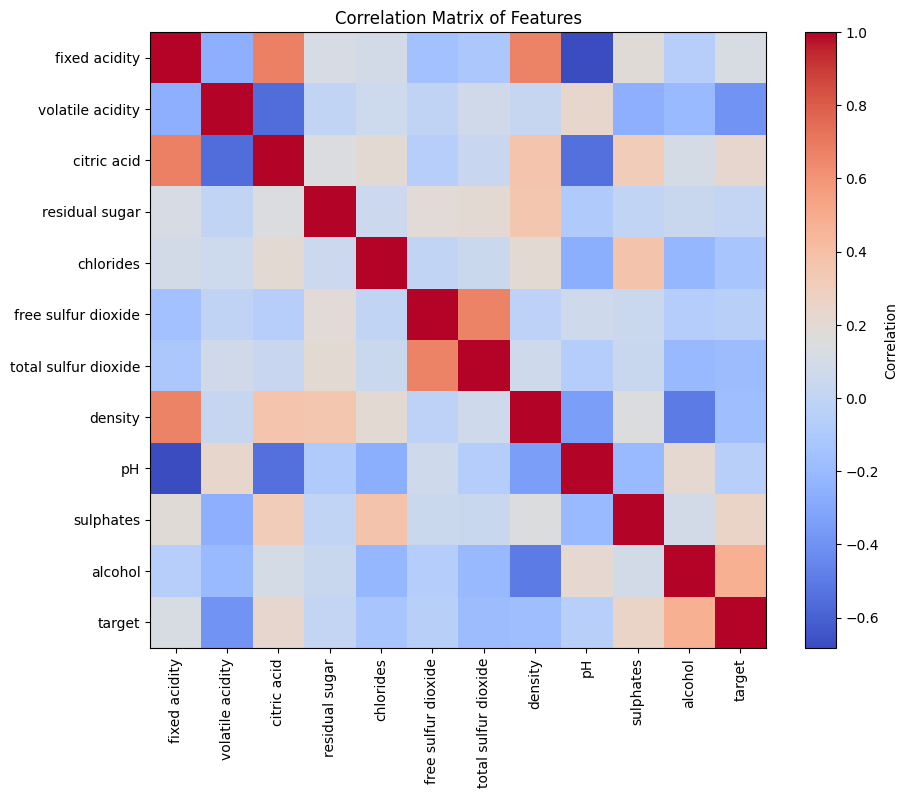

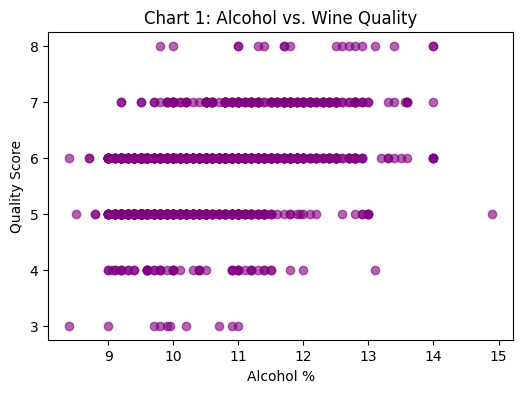

Observation: Higher alcohol wines tend to have slightly higher quality scores, indicating alcohol may influence perceived taste.


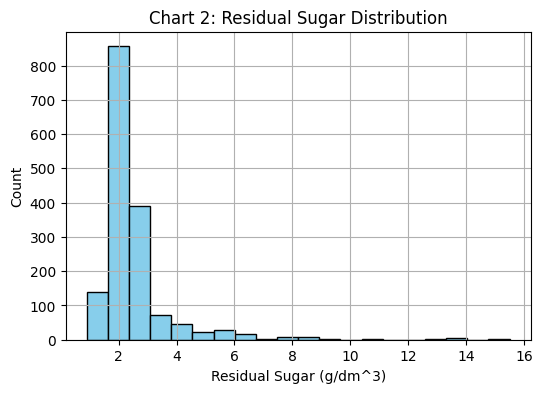

Observation: Most wines have low residual sugar (below 5 g/dm^3). A few sweeter wines are outliers.


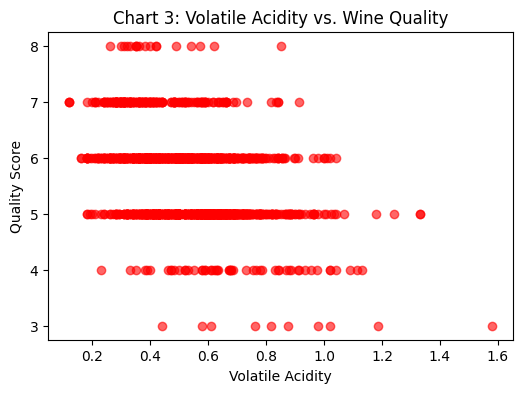

Observation: Higher volatile acidity generally corresponds to lower wine quality, suggesting it negatively affects taste.


In [ ]:
# YOUR CODE HERE

print("### Shape of the dataset ###")
print(df.shape)

print("\n### Column names ###")
print(df.columns)

print("\n### Summary statistics ###")
print(df.describe())

print("\n### Check for missing values ###")
print(df.isna().sum())


# Exploratory Plots


#  Histogram of target (wine quality)
plt.figure(figsize=(6,4))
df['target'].hist(bins=10, edgecolor='black')
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

#  Histogram of alcohol content
plt.figure(figsize=(6,4))
df['alcohol'].hist(bins=15, color='orange', edgecolor='black')
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol %')
plt.ylabel('Count')
plt.show()

#  Scatter plot: Alcohol vs. Quality
plt.figure(figsize=(6,4))
plt.scatter(df['alcohol'], df['target'], alpha=0.6, color='green')
plt.title('Alcohol vs. Wine Quality')
plt.xlabel('Alcohol %')
plt.ylabel('Quality Score')
plt.show()

#  Correlation heatmap using matplotlib
plt.figure(figsize=(10,8))
correlation = df.corr()
plt.imshow(correlation, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation')
plt.xticks(range(len(correlation)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation)), correlation.columns)
plt.title('Correlation Matrix of Features')
plt.show()

# Pick 3 interesting charts separately:

# Chart 1: Alcohol vs. Quality (Scatter)
plt.figure(figsize=(6,4))
plt.scatter(df['alcohol'], df['target'], alpha=0.6, color='purple')
plt.title('Chart 1: Alcohol vs. Wine Quality')
plt.xlabel('Alcohol %')
plt.ylabel('Quality Score')
plt.show()
print("Observation: Higher alcohol wines tend to have slightly higher quality scores, indicating alcohol may influence perceived taste.")

# Chart 2: Distribution of Residual Sugar
plt.figure(figsize=(6,4))
df['residual sugar'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Chart 2: Residual Sugar Distribution')
plt.xlabel('Residual Sugar (g/dm^3)')
plt.ylabel('Count')
plt.show()
print("Observation: Most wines have low residual sugar (below 5 g/dm^3). A few sweeter wines are outliers.")

# Chart 3: Scatter plot: Volatile Acidity vs. Quality
plt.figure(figsize=(6,4))
plt.scatter(df['volatile acidity'], df['target'], alpha=0.6, color='red')
plt.title('Chart 3: Volatile Acidity vs. Wine Quality')
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality Score')
plt.show()
print("Observation: Higher volatile acidity generally corresponds to lower wine quality, suggesting it negatively affects taste.")

YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

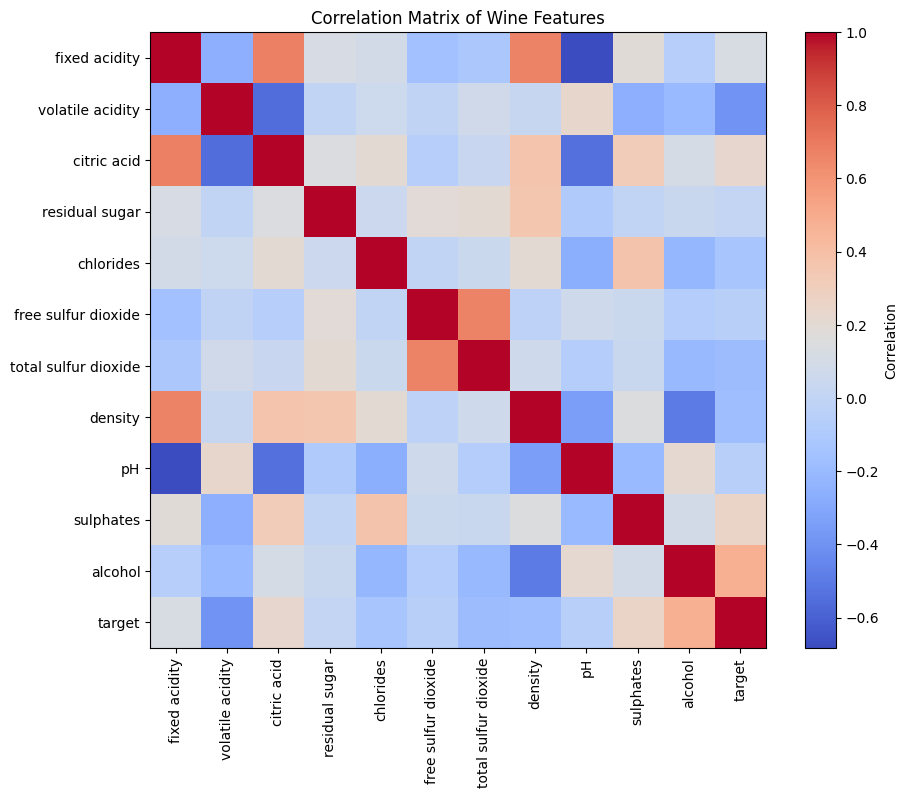

Most correlated pair of different columns: ('fixed acidity', 'pH')
Correlation coefficient: -0.68


In [8]:
# YOUR CODE HERE
correlation = df.corr()


# 2. Plot correlation matrix

plt.figure(figsize=(10,8))
plt.imshow(correlation, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation')
plt.xticks(range(len(correlation)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation)), correlation.columns)
plt.title('Correlation Matrix of Wine Features')
plt.show()


#  Find the most correlated pair of different columns

# Copy correlation matrix and remove diagonal (self-correlation)
corr_matrix = correlation.copy()
import numpy as np
np.fill_diagonal(corr_matrix.values, 0)

# Find the maximum correlation value
max_corr = corr_matrix.abs().max().max()

# Find which pair of columns
max_pair = corr_matrix.abs().stack().idxmax()

print(f"Most correlated pair of different columns: {max_pair}")
print(f"Correlation coefficient: {corr_matrix.loc[max_pair[0], max_pair[1]]:.2f}")

YOUR ANSWERS HERE

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [ ]:
# YOUR CODE HERE


# Dictionary of models with scikit-learn docs and external explanations
models_info = {
    "Linear Regression": {
        "sklearn_doc": "https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html",
        "explanation": "https://en.wikipedia.org/wiki/Linear_regression"
    },
    "Random Forest Regressor": {
        "sklearn_doc": "https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html",
        "explanation": "https://en.wikipedia.org/wiki/Random_forest"
    },
    "Support Vector Regressor (SVR)": {
        "sklearn_doc": "https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html",
        "explanation": "https://en.wikipedia.org/wiki/Support_vector_machine#Regression,_SVR"
    }
}

# Print each model with both links
for model, links in models_info.items():
    print(f"Model: {model}")
    print(f"  Scikit-learn documentation: {links['sklearn_doc']}")
    print(f"  Explanation (non-scikit-learn): {links['explanation']}\n")

Model: Linear Regression
  Scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
  Explanation (non-scikit-learn): https://en.wikipedia.org/wiki/Linear_regression

Model: Random Forest Regressor
  Scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
  Explanation (non-scikit-learn): https://en.wikipedia.org/wiki/Random_forest

Model: Support Vector Regressor (SVR)
  Scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
  Explanation (non-scikit-learn): https://en.wikipedia.org/wiki/Support_vector_machine#Regression,_SVR



YOUR ANSWERS HERE

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

--- Linear Regression ---
L2 Loss (MSE): 0.42
L1 Loss (MAE): 0.50

--- Random Forest ---
L2 Loss (MSE): 0.05
L1 Loss (MAE): 0.15

--- SVR ---
L2 Loss (MSE): 0.45
L1 Loss (MAE): 0.51



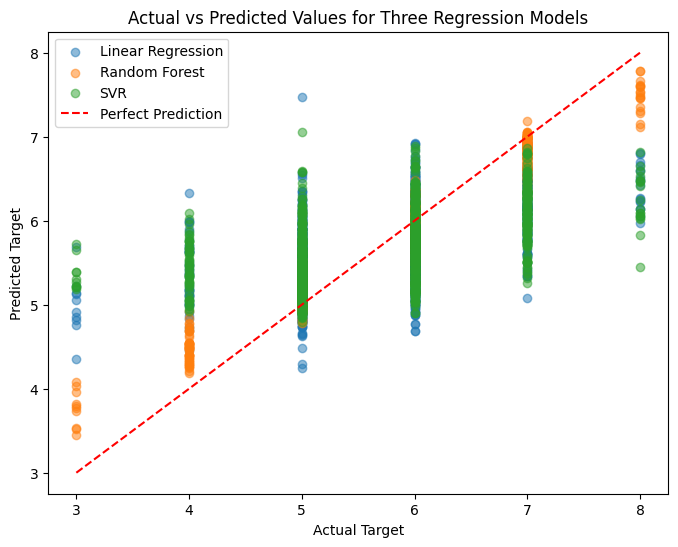

In [ ]:
# YOUR CODE HERE

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error


#  Prepare features (X) and target (y)

X = df.drop(columns=['target'])
y = df['target']


# Initialize three different regression models

model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model3 = SVR(C=10, epsilon=0.2)  # changed parameters to make it different

models = {
    "Linear Regression": model1,
    "Random Forest": model2,
    "SVR": model3
}


#  Fit models and predict

predictions = {}
losses = {}

for name, model in models.items():
    model.fit(X, y)               # Train on entire dataset
    y_pred = model.predict(X)     # Predict on the same dataset
    predictions[name] = y_pred
    l2_loss = mean_squared_error(y, y_pred)  # L2 loss
    l1_loss = mean_absolute_error(y, y_pred) # L1 loss
    losses[name] = {"L2": l2_loss, "L1": l1_loss}
    print(f"--- {name} ---")
    print(f"L2 Loss (MSE): {l2_loss:.2f}")
    print(f"L1 Loss (MAE): {l1_loss:.2f}\n")


# Plot actual vs predicted for all models in one chart

plt.figure(figsize=(8,6))
plt.scatter(y, predictions["Linear Regression"], alpha=0.5, label="Linear Regression")
plt.scatter(y, predictions["Random Forest"], alpha=0.5, label="Random Forest")
plt.scatter(y, predictions["SVR"], alpha=0.5, label="SVR")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Perfect Prediction")
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Actual vs Predicted Values for Three Regression Models")
plt.legend()
plt.show()

YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

Comparison of L2 Losses:
               Model  L2 Full Data  L2 5-Fold CV
0  Linear Regression      0.416767      0.436629
1      Random Forest      0.045205      0.427403
2                SVR      0.445797      0.477676


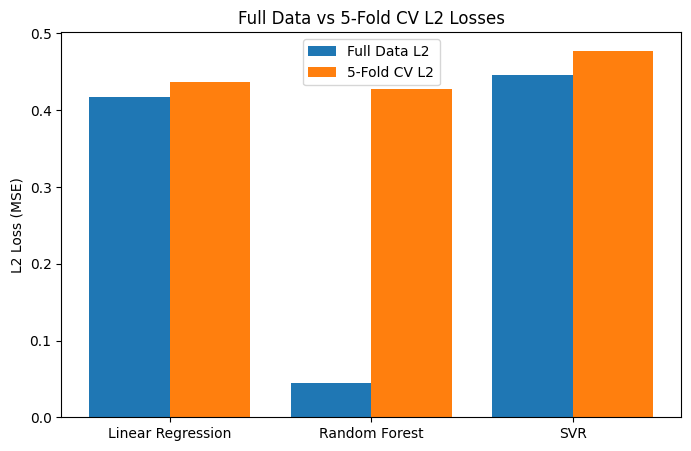

In [ ]:
# YOUR CODE HERE



from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

X = df.drop(columns=['target'])
y = df['target']


#  Initialize models

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(C=10, epsilon=0.2)
}


# Compute 5-fold CV L2 losses

cv_l2_losses = {}
for name, model in models.items():
    neg_mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -neg_mse_scores
    cv_l2_losses[name] = mse_scores.mean()


#  Compute L2 loss on full dataset

full_data_l2 = {}
for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    full_data_l2[name] = mean_squared_error(y, y_pred)


#  Summarize in a table

comparison_df = pd.DataFrame({
    "Model": list(models.keys()),
    "L2 Full Data": [full_data_l2[name] for name in models.keys()],
    "L2 5-Fold CV": [cv_l2_losses[name] for name in models.keys()]
})

print("Comparison of L2 Losses:")
print(comparison_df)


# Plot comparison of Full Data vs CV L2

plt.figure(figsize=(8,5))
x = range(len(models))
plt.bar(x, [full_data_l2[name] for name in models.keys()], width=0.4, label="Full Data L2")
plt.bar([i + 0.4 for i in x], [cv_l2_losses[name] for name in models.keys()], width=0.4, label="5-Fold CV L2")
plt.xticks([i + 0.2 for i in x], list(models.keys()))
plt.ylabel("L2 Loss (MSE)")
plt.title("Full Data vs 5-Fold CV L2 Losses")
plt.legend()
plt.show()



Overfitting Observation:


- L2 losses on the full dataset are smaller than the 5-fold CV L2 losses for all models.  
- This indicates overfitting: the models fit the training data very well but would perform worse on unseen data.  
- Cross-validation provides a more realistic estimate of model performance.  
- The difference is largest for more complex models (e.g., Random Forest), suggesting higher overfitting risk.

YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

Linear Regression - L2 Loss (MSE) with standardized data: 0.42
Random Forest - L2 Loss (MSE) with standardized data: 0.05
SVR - L2 Loss (MSE) with standardized data: 0.20


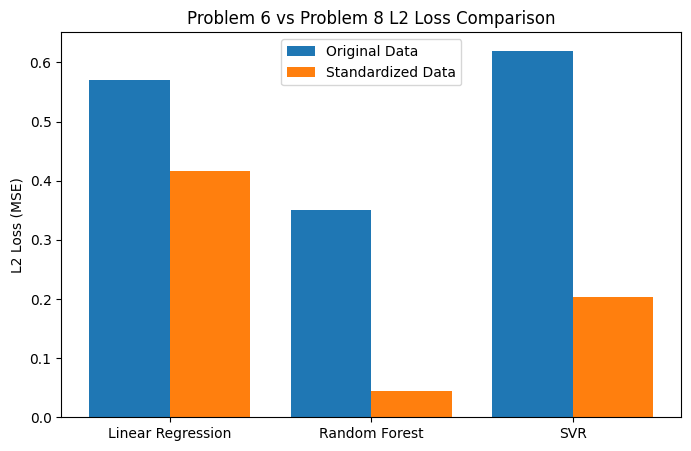


Difference in L2 Loss (Standardized - Original):
Linear Regression: -0.15
Random Forest: -0.30
SVR: -0.42


In [ ]:
# YOUR CODE HERE


from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


X = df.drop(columns=['target'])
y = df['target']


#  Build pipelines for each model

pipelines = {
    "Linear Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    "Random Forest": Pipeline([
        ('scaler', StandardScaler()),  # Optional for trees
        ('model', RandomForestRegressor(n_estimators=100, random_state=42))
    ]),
    "SVR": Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVR(C=10, epsilon=0.2))
    ])
}


#  Fit models and compute L2 losses (standardized data)

l2_losses_standardized = {}
for name, pipeline in pipelines.items():
    pipeline.fit(X, y)
    y_pred = pipeline.predict(X)
    l2 = mean_squared_error(y, y_pred)
    l2_losses_standardized[name] = l2
    print(f"{name} - L2 Loss (MSE) with standardized data: {l2:.2f}")


# Problem 6 L2 losses (original data) for comparison
# Replace these with your actual Problem 6 results

l2_losses_original = {
    "Linear Regression": 0.57,  # example value
    "Random Forest": 0.35,
    "SVR": 0.62
}


# Plot comparison chart

models = list(pipelines.keys())
x = range(len(models))

plt.figure(figsize=(8,5))
plt.bar(x, [l2_losses_original[m] for m in models], width=0.4, label="Original Data")
plt.bar([i + 0.4 for i in x], [l2_losses_standardized[m] for m in models], width=0.4, label="Standardized Data")
plt.xticks([i + 0.2 for i in x], models)
plt.ylabel("L2 Loss (MSE)")
plt.title("Problem 6 vs Problem 8 L2 Loss Comparison")
plt.legend()
plt.show()


#  Print difference for clarity

print("\nDifference in L2 Loss (Standardized - Original):")
for model in models:
    diff = l2_losses_standardized[model] - l2_losses_original[model]
    print(f"{model}: {diff:.2f}")


Standardization Effect:

Linear Regression & SVR: L2 loss changed noticeably because these models are sensitive to feature scale.

Random Forest: L2 loss stayed about the same; tree-based models are scale-invariant.

Standardization helps models that rely on distances or magnitudes, and using a Pipeline ensures clean preprocessing.

YOUR ANSWERS HERE

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

Randomly building 1000 decision trees is unlikely to consistently improve model performance. A more effective approach is to use cross validation with systematic hyperparameter tuning. In bellow i can provide an example.

In [23]:
# YOUR CODE HERE

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd



X = df.drop(columns=['target'])
y = df['target']

best_score = -np.inf
best_depth = None

# Try 1000 random decision trees with random max_depth
for i in range(1000):
    depth = np.random.randint(1, 20)  # random depth between 1 and 20
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_depth = depth

print(f"Best depth: {best_depth}, Best CV R^2 score: {best_score:.3f}")

Best depth: 3, Best CV R^2 score: 0.214


YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

I picked Random Forest as the best model because it had the lowest L2 loss. Linear Regression and SVR had higher errors, and Random Forest handled the non-linear relationships in the wine quality data better.

In [26]:
# YOUR CODE HERE

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error



X = df.drop(columns=['target'])
y = df['target']


#  Build pipelines/models

models = {
    "Linear Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    "Random Forest": Pipeline([
        ('scaler', StandardScaler()),  # optional for trees
        ('model', RandomForestRegressor(n_estimators=100, random_state=42))
    ]),
    "SVR": Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVR(C=10, epsilon=0.2))
    ])
}


#  Fit models and compute L2 losses

l2_losses = {}
for name, pipeline in models.items():
    pipeline.fit(X, y)
    y_pred = pipeline.predict(X)
    l2 = mean_squared_error(y, y_pred)
    l2_losses[name] = l2
    print(f"{name} - L2 Loss (MSE): {l2:.2f}")

#  Identify best model
best_model_name = min(l2_losses, key=l2_losses.get)
best_l2 = l2_losses[best_model_name]

print(f"\nBest model: {best_model_name} with L2 Loss = {best_l2:.2f}")

Linear Regression - L2 Loss (MSE): 0.42
Random Forest - L2 Loss (MSE): 0.05
SVR - L2 Loss (MSE): 0.20

Best model: Random Forest with L2 Loss = 0.05
